### Floating away...

In [135]:
import numpy as np
import matplotlib.pyplot as plt

a) (Z ex1.1) In your choice of programming language, create a floating point variable and
initialize it to 0.1. Now, print it out in full precision (you may need to use format specifiers
in your language to get all significant digits the computer tracks).

You should see that it is not exactly 0.1 to the computer—this is the floating point error.
The number 0.1 is not exactly representable in the binary format used for floating point.
What is the degree of floating point error you find? How does this floating point error change
if you declare variable as “single precision” versus “double precision”?

In [136]:
s = np.single(0.1)

print('0.1 in single precision is:',format(s, '.32f'))
print('The degree of precision is up to 1e-8')

0.1 in single precision is: 0.10000000149011611938476562500000
The degree of precision is up to 1e-8


In [137]:
d = np.double(0.1)

print('0.1 in double precision is:',format(d, '.64f'))
print('The degree of precision is up to 1e-17')

0.1 in double precision is: 0.1000000000000000055511151231257827021181583404541015625000000000
The degree of precision is up to 1e-17


b) (Z ex1.2) Using the method you sketched out in class, determine the roundoff error, $\epsilon$, for
your machine.

In [4]:
epsilon = 1.

while epsilon+1>1:
    epsilon = epsilon/2.
    
print('The roundoff error for my machine is:', format(epsilon, '.64f'))


The roundoff error for my machine is: 0.0000000000000001110223024625156540423631668090820312500000000000


c) For kicks, check in with a couple of your classmates who have different hardware and/or
operating systems. Compare your answers for (a) and (b). What do you find?

#### I am running:

Python 3.7 on Ubuntu 20.04.3 LTS

Processor: Intel® Core™ i7-9700 CPU @ 3.00GHz × 8 

#### Comparing to Alexa's:

MacBook Pro (13-inch, 2017, Two Thunderbolt 3 ports)

Processor: 2.3 GHz Dual-Core Intel Core i5

Memory: 8 GB 2133 MHz LPDDR3

Running python3.7

#### results

0.1 in single precision: 0.100000001490116119384765625

0.1 in double precision: 0.1000000000000000055511151231257827021181583404541015625

roundoff error: 1.1102230246251565e-16

##### ---
Her result are the same as mine, this makes sense since single and double precision numbers are allocated a fixed number of bits, independent of the machine it is running on. Therefore both machines will represent 0.1 in binary format with a fixed number of bits (32 for single and 64 for double). Similarly, in determining the round off error, the different machines will be unable to differentiate epsilon from 1 with the same round off error.

### Integral Processes

Numerical integration is important for solving ordinary differential equations, among other
data analysis tasks. Previously you’ve likely used a built-in function in Python or the
equivalent in another programming language. You may have treated it as a black-box and
didn’t think too closely about it’s degree of accuracy. In this problem, you’re going to dig into
the integration black-box a little bit more. First, you’ll start by writing you own integration
routines to evaluate a general integral:
$$
I = \int_a^b f(x)dx
$$
I. One of the simplest methods for integration as we discussed in class uses the Rectangle
Rule:
$$
I = \sum_{i=1}^{N}f(x_i)\Delta x
$$
where N is the number of (equal-sized) integration steps and $\Delta x = (b−a)/N$, $x_i = a+ (i−
1)\Delta x$.

II. Another *slightly* more sophisticated approach uses the Trapezoid Rule:
$$
I = \Delta x\sum_{i=1}^{N}\frac{f(x_i)+f(x_{i+1})}{2}
$$
This may seem to require twice as many function evaluations as the method above, but there
is a simple way to avoid this, which you should implement.

a) Numerically compute the integral
$$
\int_1^5 \frac{1}{x^{3/2}}dx
$$
with both methods above, and plot the error in the numerical integral against the step size
 $\Delta x$ for both methods. Approximately how many steps are required to get an answer with
a fractional error |$I −I_{exact}| /I_{exact} < 10^{-3}$ for the rectangle and the trapezoid rule? What
about $10^{-5}$?
What did you learn about the trade-off between method, accuracy and calculation speed?

In [77]:
def rectangle(func, a, b, N):   
    """
    Estimates the integral of function f using the Rectangle Rule
    
    Parameters
    ----------
    func : {function}
        A Python function or method to integrate. 
    a : float
        integral lower limit
    b : float 
        integral upper limit
    N : int
        number of equally spaced steps 

    Returns
    ----------
    I : float
        The integral of f from a to b.
    """

    I = 0
    dx = (b-a)/N
    for i in range(N):    #iterate through steps
        xi = a+(i*dx)    #index i starts at 0
        I = I+(func(xi)*dx)
    return I

def trapezoid(func, a, b, N): 
    """
    Estimates the integral of function f using the Trapezoid Rule
    
    Parameters
    ----------
    func : {function}
        A Python function or method to integrate. 
    a : float
        integral lower limit
    b : float 
        integral upper limit
    N : int
        number of equally spaced steps 

    Returns
    ----------
    I : float
        The integral of f from a to b.
    """
    I = 0
    dx = (b-a)/N
    for i in range(N):    #iterate through steps
        xi = a+(i*dx)    
        xip1 = a+((i+1)*dx)
        I = I+(dx*((func(xi)+func(xip1))/2.))
    return I

def f(x):
    return x**(-3./2.)

def calc_frac_err(Ieval, Iexact):
    """
    Calculates the fractional error given exact and estimated value
    """
    return abs(Ieval-Iexact)/Iexact

In [36]:
Iexact = -2./np.sqrt(5)+2.    #Evalutated analytically

N_arr = np.logspace(0,6,1000, dtype = int)

### Calculate integral using Rectangle Rule
frac_err_rec = np.array([calc_frac_err(rectangle(f, 1, 5, N), Iexact) for N in N_arr])

### Calculate integral using Trapezoid Rule
frac_err_trap = np.array([calc_frac_err(trapezoid(f, 1, 5, N), Iexact) for N in N_arr])

Using the Rectangle Rule:
The number of step required to get a fractional error of < 0.001 is approximately: 1668 steps
The number of step required to get a fractional error of < 1e-05 is approximately: 165362 steps

Using the Trapezoid Rule:
The number of step required to get a fractional error of < 0.001 is approximately: 43 steps
The number of step required to get a fractional error of < 1e-05 is approximately: 429 steps


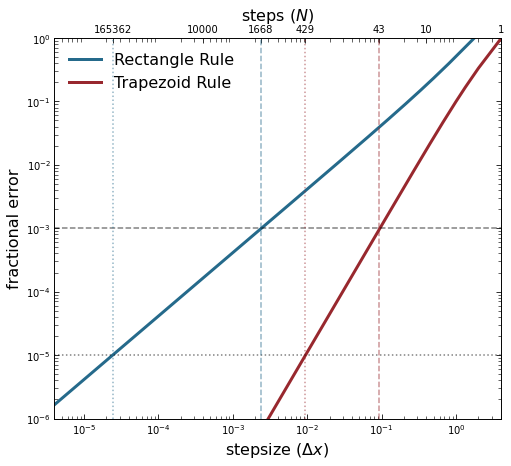

In [42]:
### Plot results

stepsize = 4./N_arr    #stepsize = (b-a)/N

e1_idx_rec = np.argmax(frac_err_rec < 1e-3)    #index of first instance where the fractional error < 1e-3
e2_idx_rec = np.argmax(frac_err_rec < 1e-5)    #index of first instance where the fractional error < 1e-5

e1_idx_trap = np.argmax(frac_err_trap < 1e-3)    #index of first instance where the fractional error < 1e-3
e2_idx_trap = np.argmax(frac_err_trap < 1e-5)    #index of first instance where the fractional error < 1e-5


print("Using the Rectangle Rule:")
print("The number of step required to get a fractional error of < {} is approximately:".format(1e-3), 
      N_arr[e1_idx_rec], "steps")
print("The number of step required to get a fractional error of < {} is approximately:".format(1e-5), 
      N_arr[e2_idx_rec], "steps")

print("\nUsing the Trapezoid Rule:")
print("The number of step required to get a fractional error of < {} is approximately:".format(1e-3), 
      N_arr[e1_idx_trap], "steps")
print("The number of step required to get a fractional error of < {} is approximately:".format(1e-5), 
      N_arr[e2_idx_trap], "steps")


fig = plt.figure(figsize = (8, 7))
ax1 = fig.add_subplot(111)

### make second axis for steps (N)
ax2 = ax1.twiny()
###

ax1.plot(stepsize,frac_err_rec, lw=3, label='Rectangle Rule')
ax1.plot(stepsize,frac_err_trap, color='#98282E', lw=3, label='Trapezoid Rule')

ax1.set_yscale('log')
ax1.set_xscale('log')
ax2.set_xscale('log')
ax1.set_xlim(4e-6, 4)
ax1.set_ylim(1e-6, 1)

### Configure axis for N
ax2.set_xlim(ax1.get_xlim())
step_tick_labels = np.array([1, 10, N_arr[e1_idx_trap], N_arr[e1_idx_rec], 
                             N_arr[e2_idx_trap],10000, N_arr[e2_idx_rec]])
tick_loc = 4./step_tick_labels
ax2.set_xticks(tick_loc)
ax2.set_xticklabels(step_tick_labels)

### Plot lines for error of 1e-3 and 1e-5
ax1.axhline(1e-3,0, 4, ls='dashed', color = 'k', alpha=0.5)
ax1.axhline(1e-5,0, 4, ls='dotted', color = 'k', alpha=0.5)
ax2.axvline(stepsize[e1_idx_rec], ls='dashed', alpha=0.5)
ax2.axvline(stepsize[e2_idx_rec], ls='dotted', alpha=0.5)

ax2.axvline(stepsize[e1_idx_trap], ls='dashed', color='#98282E', alpha=0.5)
ax2.axvline(stepsize[e2_idx_trap], ls='dotted', color='#98282E', alpha=0.5)
###

ax1.set_xlabel(r'stepsize ($\Delta x$)', fontsize=16)
ax2.set_xlabel(r'steps ($N$)', fontsize=16)
ax1.set_ylabel(r'fractional error', fontsize=16)
ax1.legend(fontsize = 16)

The method to evalutating the integral is most efficient in reducing the calculation time to achieve the same accuracy. Implementing the Rectangle Rule, in order to achieve an order of 1e2 better accuracy, we also needed to compute 1e2 more calculations, requiring ~160000 operations to achieve a fractional error of 1e-5. Improving the method (i.e. using the Trapeoid Rule), we needed to increase the steps by a factor of 4 to improve the fractional error to 1e-5, requiring only 429 steps. Based on this, in order to improve numercal integration, I would first focus on a improving the method before trying to reduce the stepsize to get more accurate results.

b) Compare the results of your two integration routines to a built-in function in your programming language (or another common package like Mathematica or Matlab). For example,
if you’re using Python, you may use one of the functions available in the scipy.integrate module. In Mathematica, you could use the Integrate function. What is the order accuracy of
the black-box method? What is the default approach to integration? What step sizes do
you need above to obtain a similar result?

In [48]:
import scipy.integrate as integrate

I_scipy, abs_err = integrate.quad(f, 1, 5)    #returns the absolute error

frac_err_scipy = abs_err/Iexact    #to get fractional error

print('The fractional error from scipy.integrate.quad is', frac_err_scipy)

The fractional error from scipy.integrate.quad is 4.924422546970678e-13


The scipy.integrate.quad function uses QUADPACK, which is a FORTRAN77 library that estimates integrals using numerical quadrature, and for finite integrals, uses global adaptive quadrature based on 21-point Gauss–Kronrod quadrature within each subinterval, with acceleration by Peter Wynn's epsilon algorithm. 
In general, adaptive quadrature makes an approximation of the integral from a to b and caluclates an error estimate. If the estimated error is larger than some tolerance, the integral is subdivided into two integrals (from a to some value m, and m to b) and both halves are integrated seperately. Either the initial estimate or the sum of the recursively computed halves is returned.

(Piessens, R. Quadpack : a Subroutine Package for Automatic Integration / R. Piessens et al. Berlin: Springer-Verlag, 1983. Print.)

In [49]:
### To try to achieve a fractional error similar to scipy.integrate.quad
N_arr = np.logspace(6,7,10, dtype = int)

### Calculate integral using Rectangle Rule
frac_err_rec_comp = np.array([calc_frac_err(rectangle(f, 1, 5, N), Iexact) for N in N_arr])

### Calculate integral using Trapezoid Rule
frac_err_trap_comp = np.array([calc_frac_err(trapezoid(f, 1, 5, N), Iexact) for N in N_arr])

In [63]:
print('for step sizes\n',4./N_arr[-2:])
print('\nRectangle Rule returns a fractional error of\n', frac_err_rec_comp[-2:])
print('\nTrapezoid Rule returns a fractional error of\n', frac_err_trap_comp[-2:])

print('''\nThe Trapezoid Rule achieves a similar level of accuracy with step sizes ! 5e-7, or
about 7e6 steps over [a,b]. Based on these results, I would say in order to achieve a fractional 
error on order of 1e-13 using the Rectangle Rule, we would need about 1e13 steps over [a,b],  
or step sizes on the order of 1e-13, since the fractional error seems to scale linearly 
with ~stepsize.''')

for step sizes
 [5.16619921e-07 4.00000000e-07]

Rectangle Rule returns a fractional error of
 [2.12745934e-07 1.64721344e-07]

Trapezoid Rule returns a fractional error of
 [1.09659313e-13 7.93322866e-14]

The Trapezoid Rule achieves a similar level of accuracy with step sizes ! 5e-7, or
about 7e6 steps over [a,b]. Based on these results, I would say in order to achieve a fractional 
error on order of 1e-13 using the Rectangle Rule, we would need about 1e13 steps over [a,b],  
or step sizes on the order of 1e-13, since the fractional error seems to scale linearly 
with ~stepsize.


### Shooting for the stars

Now let’s use our integration routines to evaluate an astronomy problem! Choose one of the
following and use one of the integration methods you coded above to solve it:

b) Write a program that computes the integral
$$
D_c = \int_0^z dz' [\Omega_m(1+z')^3 +(1. - \Omega_m-\Omega_\Lambda)(1+z')^2+\Omega_\Lambda]^{-1/2}
$$
given input values of $\Omega_m$, $\Omega_\Lambda$ and $z$. If you look up Hogg (1999, astro-ph/99055116), equation
(15) you will see that this integral, multiplied by $cH^{-1}_0$ = 3000$h^{-1}$ Mpc, gives the “comoving
distance” to an object at redshift $z$ in a universe with matter density parameter $\Omega_m$ and cosmological constant $\Omega_\Lambda$. This can in turn be used to calculate (with no additional integrals)
other cosmologically useful distances like the luminosity or angular diameter distance.

What is the comoving distance to $z$ = 2 in a universe with $\Omega_m$ = 0.3 and $\Omega_\Lambda$ = 0.7? Make
a plot of the comoving distance in Mpc versus redshift for $z$ = 0 −10.

In [138]:
def integrand(z):
    Omm = 0.3
    OmL = 0.7
    return (Omm*(1+z)**3 + (1-Omm-OmL)*(1+z)**2 + OmL)**(-1./2.)

In [129]:
z_arr = np.linspace(0, 10, 1000)

Dc =np.array([trapezoid(integrand, 0, z, 1000) for z in z_arr]) 

### In Mpc, assuming h=0.7
Dc_Mpc = Dc*3000./0.7
Dc_z2 = Dc_Mpc[np.abs(z_arr - 2).argmin()]     #Comoving Distance at z=2

The comoving distance to z = 2 is 5186.34 Mpc


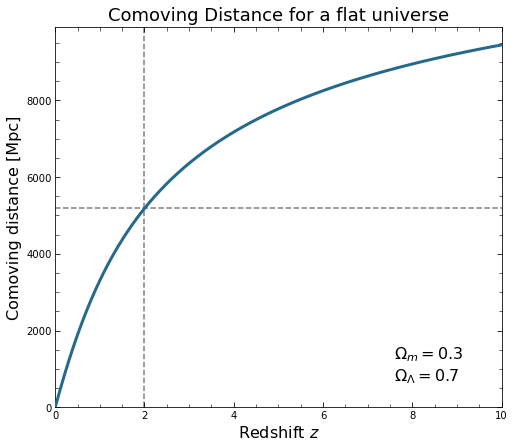

In [134]:
fig = plt.figure(figsize = (8, 7))
ax1 = fig.add_subplot(111)

ax1.plot(z_arr,Dc_Mpc, lw=3, zorder = 20)

s =  r'$\Omega_m = 0.3$' +'\n'+r'$\Omega_\Lambda = 0.7$'
ax1.text(7.6, 700, s, fontsize = 16)

ax1.set_xlim(0,10)
ax1.set_ylim(bottom=0)
ax1.axvline(2, ls='dashed', color='k', alpha = 0.5)
ax1.axhline(Dc_z2, ls='dashed', color='k', alpha = 0.5)

ax1.set_xlabel(r'Redshift $z$', fontsize=16)
ax1.set_ylabel(r'Comoving distance [Mpc]', fontsize=16)
ax1.set_title('Comoving Distance for a flat universe', fontsize=18)

print('The comoving distance to z = 2 is {:.2f} Mpc'.format(Dc_z2))